In [1]:
#TODO: usdes for classification problem
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler 
import category_encoders as ce

In [2]:
irisdata = pd.read_csv('iris.csv')
irisdata

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [3]:
irisdata.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
irisdata.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [5]:
irisdata.shape

(150, 5)

In [6]:
irisdata.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [7]:
irisdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
irisdata.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal.length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal.width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal.length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal.width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [9]:
irisdata.duplicated().sum()

1

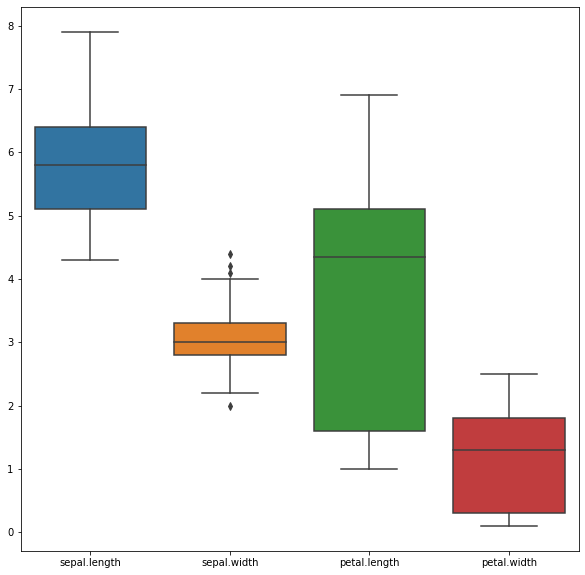

In [10]:
plt.figure(figsize=(10,10))
sb.boxplot(data=irisdata)
plt.show()

In [11]:
X_fea = irisdata.drop(columns='variety')
Y_tar = irisdata['variety']

In [12]:
X_train,X_test,Y_train,Y_test = train_test_split(X_fea,Y_tar,test_size=0.3,random_state=42)

In [20]:
print(len(X_train))
print(len(X_test))

105
45


In [21]:
NB_clf = GaussianNB()
NB_clf

GaussianNB()

In [33]:
NB_clf.fit(X_train,Y_train)

GaussianNB()

In [34]:
y_pred = NB_clf.predict(X_test)

In [35]:
y_pred[:5]

array(['Versicolor', 'Setosa', 'Virginica', 'Versicolor', 'Versicolor'],
      dtype='<U10')

In [36]:
accuracy_score(Y_test,y_pred)

0.9777777777777777

In [37]:
# st_nb_clf = StandardScaler()
# X_trainst = st_nb_clf.fit_transform(X_train)
# X_testst = st_nb_clf.fit_transform(X_test)
# no need of scaling here

In [38]:
print('{0:0.4f}'.format(accuracy_score(Y_test,y_pred)))

0.9778


In [39]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        19
  Versicolor       1.00      0.92      0.96        13
   Virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [40]:
cm = confusion_matrix(Y_test,y_pred)
cm

array([[19,  0,  0],
       [ 0, 12,  1],
       [ 0,  0, 13]], dtype=int64)

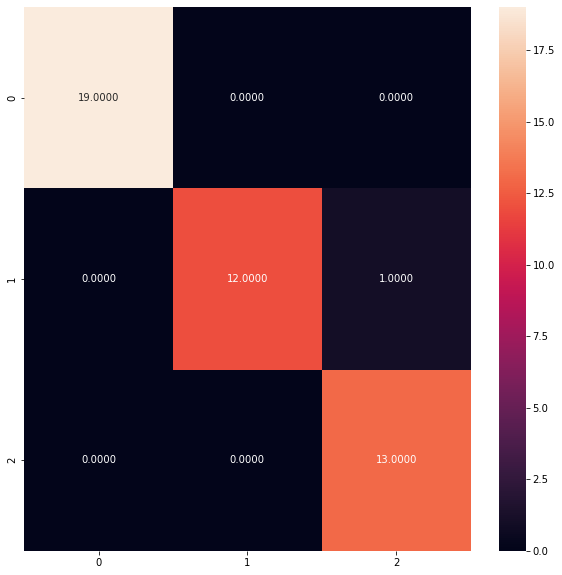

In [43]:
plt.figure(figsize=(10,10))
sb.heatmap(cm,annot=True,fmt='0.04f')
plt.show()